##  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score

## Data Exploration

#### Reading the files

In [3]:
data = pd.read_csv("public_data_waste_fee.csv")

In [4]:
data.shape

(4341, 39)

In [5]:
data.head(10)

,region,province,name,tc,cres,csor,istat,area,pop,alt,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,...,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,...,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,...,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,...,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,...,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867
5,Emilia_Romagna,Ferrara,Jolanda di Savoia,232.509995,44.160000,50.049999,38010,108.339996,3003,1.0,...,1682628,79.22,3.0,65.0,33.105049,15.233530,7.782785,3.776468,9.502230,8.016269
6,Emilia_Romagna,Ferrara,Tresignana,215.470001,45.910000,45.820000,38030,43.060001,7364,1.0,...,3336429,83.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lazio,Roma,Fiumicino,229.050003,50.070000,135.720001,58120,213.889999,67626,1.0,...,33435410,76.39,2.0,329.0,11.051060,11.285970,7.570812,5.489089,9.470534,7.797937
8,Veneto,Venezia,Caorle,560.780029,200.220001,198.479996,27005,153.830002,11793,1.0,...,15175582,62.71,3.0,77.0,9.898176,11.296785,7.818569,5.010459,9.514799,8.053126
9,Liguria,Imperia,Riva Ligure,295.329987,35.529999,92.489998,8050,2.070000,2861,2.0,...,1553789,80.92,3.0,17.0,0.000000,16.863464,7.243186,5.126625,9.397199,7.460482


#### Information about the columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      4341 non-null   object 
 1   province    4341 non-null   object 
 2   name        4335 non-null   object 
 3   tc          4341 non-null   float64
 4   cres        4289 non-null   float64
 5   csor        4274 non-null   float64
 6   istat       4341 non-null   int64  
 7   area        4335 non-null   float64
 8   pop         4341 non-null   int64  
 9   alt         4335 non-null   float64
 10  isle        4335 non-null   float64
 11  sea         4335 non-null   float64
 12  pden        4335 non-null   float64
 13  wden        4335 non-null   float64
 14  urb         4335 non-null   float64
 15  fee         4341 non-null   object 
 16  d_fee       4341 non-null   int64  
 17  sample      4341 non-null   int64  
 18  organic     3829 non-null   float64
 19  paper       4316 non-null  

### Most important features relative to target

In [7]:
corr = data.corr()
corr.sort_values(["finance"], ascending = False, inplace = True)
print(corr.finance)

gdp           1.000000
finance       1.000000
alt           0.466086
tc            0.425476
cres          0.400337
urb           0.323812
s_landfill    0.216314
csor          0.203540
istat         0.192090
area          0.169670
glass         0.168658
sea           0.125317
plastic       0.069677
roads         0.057025
isle          0.047803
msw_un        0.045604
msw           0.034696
pop           0.028322
raee          0.021426
msw_so        0.020659
texile        0.014644
metal        -0.030607
organic      -0.060589
d_fee        -0.083654
paper        -0.159886
wden         -0.169451
pden         -0.191937
s_wteregio   -0.212591
other        -0.242471
wood         -0.279499
sor          -0.300770
wage         -0.317302
sample       -0.354910
geo          -0.382034
proads       -0.451471
Name: finance, dtype: float64


## Data Visualization

#### Histograms

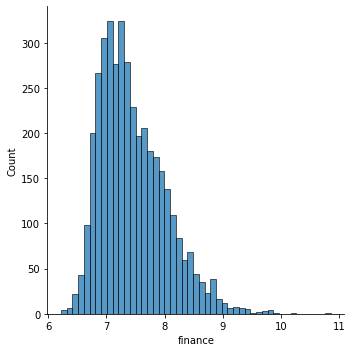

In [8]:
sns.displot(data['finance']);

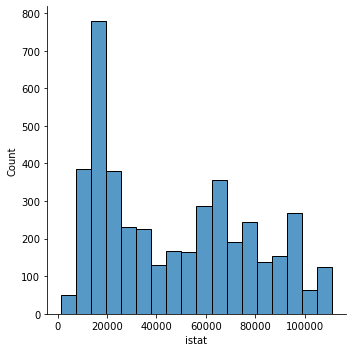

In [9]:
sns.displot(data['istat']);

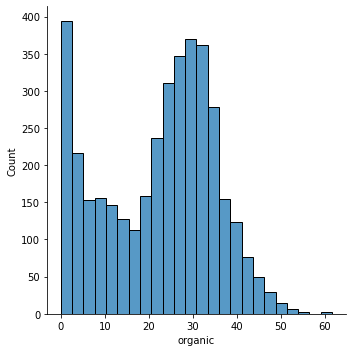

In [10]:
sns.displot(data['organic']);

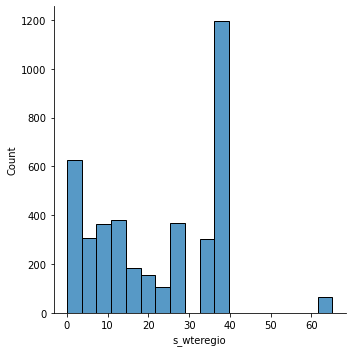

In [11]:
sns.displot(data['s_wteregio']);

#### Boxplots

C:\Users\Satvik V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='istat'>

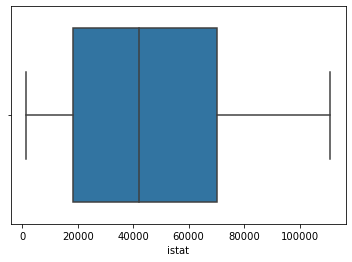

In [12]:
sns.boxplot(data['istat'])

C:\Users\Satvik V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='s_landfill'>

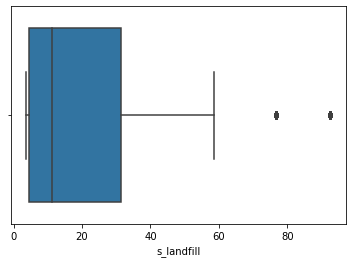

In [13]:
sns.boxplot(data['s_landfill'])

C:\Users\Satvik V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wage'>

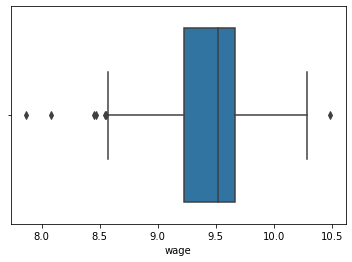

In [14]:
sns.boxplot(data['wage'])

C:\Users\Satvik V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='organic'>

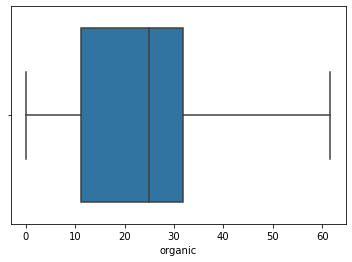

In [15]:
sns.boxplot(data['organic'])

### Correlation matrix (heatmap style)

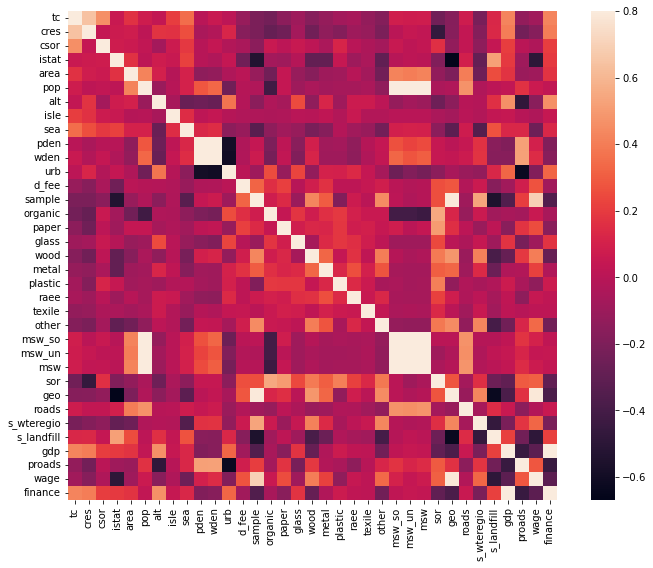

In [16]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Barplots

Text(0.5, 1.0, 'Region Distribution')

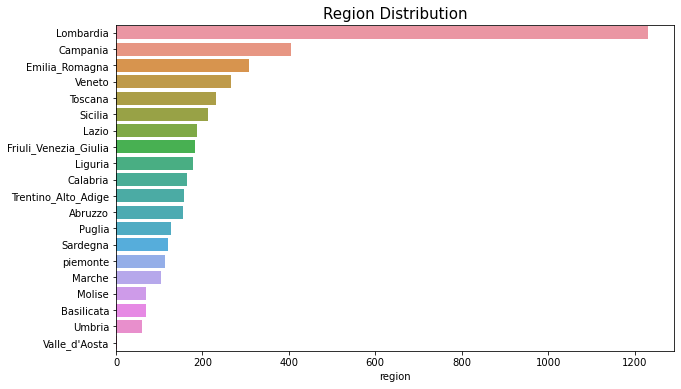

In [17]:
region_count = data['region'].value_counts()
plt.figure(figsize = (10,6))
axes = sns.barplot(x = region_count, y = region_count.index)
axes.set_title("Region Distribution", fontsize = 15)

Text(0.5, 1.0, 'Province Distribution')

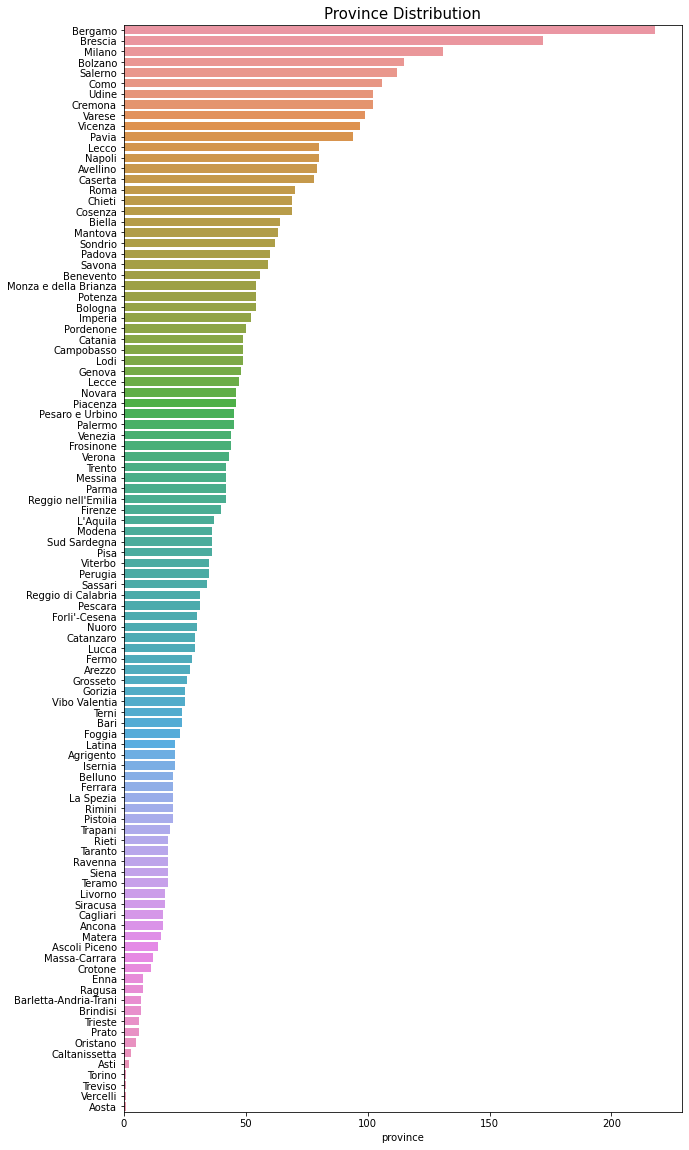

In [18]:
province_count = data['province'].value_counts()
plt.figure(figsize = (10,20))
axes = sns.barplot(x = province_count, y = province_count.index)
axes.set_title("Province Distribution", fontsize = 15)

#### Scatterplot/Regplot

<AxesSubplot:xlabel='tc', ylabel='finance'>

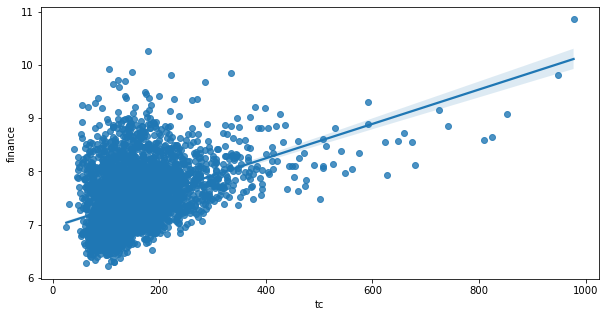

In [19]:
plt.figure(figsize=(10,5),)
sns.regplot(x=data['tc'], y=data['finance'])

## Data Preprocessing

#### Handeling outliers

In [20]:
upper_limit = data['area'].quantile(0.99)
lower_limit = data['area'].quantile(0.01)

data = data[(data.area < upper_limit) & (data.area > lower_limit)]

#### Splitting the data into numerical and categorical features


In [21]:
numerical = data.select_dtypes(['int64','float64'])
categorical = data.select_dtypes(['object'])

In [22]:
numerical

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
1,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,...,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,...,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,...,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,...,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867
5,232.509995,44.160000,50.049999,38010,108.339996,3003,1.0,0.0,0.0,27.718296,...,1682628,79.22,3.0,65.0,33.105049,15.233530,7.782785,3.776468,9.502230,8.016269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,977.419983,469.290009,57.480000,16103,16.139999,202,1508.0,0.0,0.0,12.515490,...,188003,38.76,3.0,20.0,38.501492,4.551430,10.538720,2.224623,9.505127,10.854882
4331,132.809998,32.380001,71.739998,21027,209.649994,2423,1520.0,0.0,0.0,11.557358,...,1466016,70.63,3.0,52.0,18.539640,11.318043,8.413345,3.819020,9.599592,8.665746
4332,156.429993,62.910000,63.680000,21089,56.240002,2660,1563.0,0.0,0.0,47.297295,...,3405016,64.84,3.0,40.0,18.539640,11.318043,8.609627,4.187419,10.174608,8.867916
4333,370.880005,89.139999,260.179993,21026,38.840000,1320,1568.0,0.0,0.0,33.985580,...,2527097,75.21,3.0,66.0,18.539640,11.318043,8.750687,3.039358,10.249179,9.013207


#### checking for na values

In [23]:
numerical.isna().sum()

tc               0
cres            52
csor            67
istat            0
area             0
pop              0
alt              0
isle             0
sea              0
pden             0
wden             0
urb              0
d_fee            0
sample           0
organic        499
paper           23
glass           33
wood          1081
metal          242
plastic         38
raee           310
texile        1001
other          134
msw_so           0
msw_un           0
msw              0
sor              0
geo            277
roads          428
s_wteregio     277
s_landfill     277
gdp            373
proads         428
wage           277
finance        373
dtype: int64

In [24]:
categorical

,region,province,name,fee
1,Emilia_Romagna,Ferrara,Lagosanto,PAYT
2,Emilia_Romagna,Ferrara,Goro,PAYT
3,Emilia_Romagna,Ferrara,Mesola,PAYT
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,STANDARD
5,Emilia_Romagna,Ferrara,Jolanda di Savoia,PAYT
...,...,...,...,...
4330,Lombardia,Bergamo,Foppolo,STANDARD
4331,Trentino_Alto_Adige,Bolzano,Curon Venosta/Graun im Vinschgau,PAYT
4332,Trentino_Alto_Adige,Bolzano,Selva di Val Gardena/Wolkenstein in Gröden,PAYT
4333,Trentino_Alto_Adige,Bolzano,Corvara in Badia/Corvara,PAYT


#### checking for na values

In [25]:
categorical.isna().sum()

region      0
province    0
name        0
fee         0
dtype: int64

#### Dropping the column name 


In [26]:
categorical = categorical.drop(['name'], axis=1)

#### Filling columns with blank values with 0 

In [27]:
missing_value_0 = ['organic', 'paper', 'glass', 'wood', 'metal', 'plastic', 'raee', 'texile', 'other']

for i in missing_value_0:
    numerical[i] = numerical[i].fillna(0)

In [28]:
numerical.isna().sum()

tc              0
cres           52
csor           67
istat           0
area            0
pop             0
alt             0
isle            0
sea             0
pden            0
wden            0
urb             0
d_fee           0
sample          0
organic         0
paper           0
glass           0
wood            0
metal           0
plastic         0
raee            0
texile          0
other           0
msw_so          0
msw_un          0
msw             0
sor             0
geo           277
roads         428
s_wteregio    277
s_landfill    277
gdp           373
proads        428
wage          277
finance       373
dtype: int64

#### filling numerical na values using median

In [29]:
numerical = numerical.fillna(numerical.median())

#### converting (object) dtypes features into (int32) dtypes

In [30]:
l=LabelEncoder()
categorical = categorical.apply(l.fit_transform)

In [31]:
categorical

,region,province,fee
1,4,30,0
2,4,30,0
3,4,30,0
4,11,8,1
5,4,30,0
...,...,...,...
4330,8,11,1
4331,15,14,0
4332,15,14,0
4333,15,14,0


#### Merging the numerical and categorical features

In [32]:
data = pd.concat([numerical,categorical], axis=1)

In [33]:
data

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,...,roads,s_wteregio,s_landfill,gdp,proads,wage,finance,region,province,fee
1,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,...,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284,4,30,0
2,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,...,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891,4,30,0
3,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,...,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514,4,30,0
4,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,...,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867,11,8,1
5,232.509995,44.160000,50.049999,38010,108.339996,3003,1.0,0.0,0.0,27.718296,...,65.0,33.105049,15.233530,7.782785,3.776468,9.502230,8.016269,4,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,977.419983,469.290009,57.480000,16103,16.139999,202,1508.0,0.0,0.0,12.515490,...,20.0,38.501492,4.551430,10.538720,2.224623,9.505127,10.854882,8,11,1
4331,132.809998,32.380001,71.739998,21027,209.649994,2423,1520.0,0.0,0.0,11.557358,...,52.0,18.539640,11.318043,8.413345,3.819020,9.599592,8.665746,15,14,0
4332,156.429993,62.910000,63.680000,21089,56.240002,2660,1563.0,0.0,0.0,47.297295,...,40.0,18.539640,11.318043,8.609627,4.187419,10.174608,8.867916,15,14,0
4333,370.880005,89.139999,260.179993,21026,38.840000,1320,1568.0,0.0,0.0,33.985580,...,66.0,18.539640,11.318043,8.750687,3.039358,10.249179,9.013207,15,14,0


## Data Modelling

#### Assigning train and test columns to X and y

In [34]:
X = data.drop('finance',axis=1)
y = data['finance']

In [35]:
X

,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,...,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,region,province,fee
1,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,...,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,4,30,0
2,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,...,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,4,30,0
3,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,...,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,4,30,0
4,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,...,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,11,8,1
5,232.509995,44.160000,50.049999,38010,108.339996,3003,1.0,0.0,0.0,27.718296,...,3.0,65.0,33.105049,15.233530,7.782785,3.776468,9.502230,4,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,977.419983,469.290009,57.480000,16103,16.139999,202,1508.0,0.0,0.0,12.515490,...,3.0,20.0,38.501492,4.551430,10.538720,2.224623,9.505127,8,11,1
4331,132.809998,32.380001,71.739998,21027,209.649994,2423,1520.0,0.0,0.0,11.557358,...,3.0,52.0,18.539640,11.318043,8.413345,3.819020,9.599592,15,14,0
4332,156.429993,62.910000,63.680000,21089,56.240002,2660,1563.0,0.0,0.0,47.297295,...,3.0,40.0,18.539640,11.318043,8.609627,4.187419,10.174608,15,14,0
4333,370.880005,89.139999,260.179993,21026,38.840000,1320,1568.0,0.0,0.0,33.985580,...,3.0,66.0,18.539640,11.318043,8.750687,3.039358,10.249179,15,14,0


In [36]:
y

1        7.323284
2        7.485891
3        7.298514
4        7.464867
5        8.016269
          ...    
4330    10.854882
4331     8.665746
4332     8.867916
4333     9.013207
4334     8.717685
Name: finance, Length: 4247, dtype: float64

#### Splitting the price_train dataset into training and testing

In [253]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=56)

#### Decision Trees

In [276]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(r2_score(y_test, y_pred))

0.9839235099251359


#### Random Forests

In [78]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(r2_score(y_test, y_pred))

0.9997252441208312


#### Linera Regression

In [40]:
ligreg = LinearRegression()
ligreg.fit(X_train, y_train)
y_pred = ligreg.predict(X_test)
print(r2_score(y_test, y_pred))

1.0
